### Imports

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import arff
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Preprocessing

In [2]:
data, meta = arff.loadarff('/Users/anilthapa/ML_Project/data/autism-screening-adult/Autism-Adult-Data.arff')

In [3]:
df = DataFrame(data)
df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',...,b'f',b'White-European',b'no',b'no',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',...,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',...,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',...,b'f',b'White-European',b'no',b'yes',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',...,b'f',b'?',b'no',b'no',b'Egypt',b'no',2.0,b'18 and more',b'?',b'NO'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    object 
 1   A2_Score         704 non-null    object 
 2   A3_Score         704 non-null    object 
 3   A4_Score         704 non-null    object 
 4   A5_Score         704 non-null    object 
 5   A6_Score         704 non-null    object 
 6   A7_Score         704 non-null    object 
 7   A8_Score         704 non-null    object 
 8   A9_Score         704 non-null    object 
 9   A10_Score        704 non-null    object 
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

We seperated out age and result of the test because they are only two float values. The rest of the dataframe has type object. which we will decode separately.

In [5]:
df_float = df[['age', 'result']]

In [6]:
df = df.select_dtypes(object)
df = df.stack().str.decode('utf-8').unstack()

In [7]:
df.shape

(704, 19)

In [8]:
df = pd.concat([df, df_float], axis=1, join='outer')

In [9]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD,age,result
0,1,1,1,1,0,0,1,1,0,0,...,White-European,no,no,United States,no,18 and more,Self,NO,26.0,6.0
1,1,1,0,1,0,0,0,1,0,1,...,Latino,no,yes,Brazil,no,18 and more,Self,NO,24.0,5.0
2,1,1,0,1,1,0,1,1,1,1,...,Latino,yes,yes,Spain,no,18 and more,Parent,YES,27.0,8.0
3,1,1,0,1,0,0,1,1,0,1,...,White-European,no,yes,United States,no,18 and more,Self,NO,35.0,6.0
4,1,0,0,0,0,0,0,1,0,0,...,?,no,no,Egypt,no,18 and more,?,NO,40.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,White-European,no,no,Russia,no,18 and more,Self,YES,25.0,7.0
700,1,0,0,0,0,0,0,1,0,1,...,Hispanic,no,no,Mexico,no,18 and more,Parent,NO,34.0,3.0
701,1,0,1,1,1,0,1,1,0,1,...,?,no,no,Russia,no,18 and more,?,YES,24.0,7.0
702,1,0,0,1,1,0,1,0,1,1,...,South Asian,no,no,Pakistan,no,18 and more,Self,NO,35.0,6.0


In [10]:
df.shape

(704, 21)

A brief into into the dataset before we proceeds into the data analysis:
- `A1_score`: `A10_score` represents the behavoiral questions that are asked whether to 
- `gender`: Male or Female
- `ethnicity`: 
- `jundice`: whether they were born with jaundice
- `autism`: whether anyone in the family had autism or not
- `country_of_res`: country of residence
- `used_app_before`: whether used screening app before or not
- `age_desc`: age of the adult
- `relation`: the person who is completing the test
- `Class/ASD`: the output features, which says a given adult has autism or not. 

In [11]:
df.shape

(704, 21)

In [12]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity',
       'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc',
       'relation', 'Class/ASD', 'age', 'result'],
      dtype='object')

In [13]:
meta

Dataset: adult-weka.filters.unsupervised.attribute.NumericToNominal-Rfirst-10
	A1_Score's type is nominal, range is ('0', '1')
	A2_Score's type is nominal, range is ('0', '1')
	A3_Score's type is nominal, range is ('0', '1')
	A4_Score's type is nominal, range is ('0', '1')
	A5_Score's type is nominal, range is ('0', '1')
	A6_Score's type is nominal, range is ('0', '1')
	A7_Score's type is nominal, range is ('0', '1')
	A8_Score's type is nominal, range is ('0', '1')
	A9_Score's type is nominal, range is ('0', '1')
	A10_Score's type is nominal, range is ('0', '1')
	age's type is numeric
	gender's type is nominal, range is ('f', 'm')
	ethnicity's type is nominal, range is ('White-European', 'Latino', 'Others', 'Black', 'Asian', 'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic', 'Turkish', 'others')
	jundice's type is nominal, range is ('no', 'yes')
	austim's type is nominal, range is ('no', 'yes')
	contry_of_res's type is nominal, range is ('United States', 'Brazil', 'Spain', 'Egyp

In [14]:
df[df['ethnicity'] == 'others']

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD,age,result
657,1,1,0,0,1,0,1,0,1,0,...,others,no,no,United States,no,18 and more,Self,NO,36.0,5.0


In [15]:
df.drop(df[df['ethnicity'] == 'others'].index, inplace = True)

There is only one values that seems to have no ethinicity. So, we can go ahead and drop it

In [16]:
df[df['ethnicity'] == '?']

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD,age,result
4,1,0,0,0,0,0,0,1,0,0,...,?,no,no,Egypt,no,18 and more,?,NO,40.0,2.0
12,0,1,1,1,1,1,0,0,1,0,...,?,no,no,Bahamas,no,18 and more,?,NO,17.0,6.0
13,1,0,0,0,0,0,1,1,0,1,...,?,no,no,Austria,no,18 and more,?,NO,17.0,4.0
14,1,0,0,0,0,0,1,1,0,1,...,?,no,no,Argentina,no,18 and more,?,NO,17.0,4.0
19,0,0,0,0,0,0,1,1,0,1,...,?,yes,no,United Arab Emirates,no,18 and more,?,NO,34.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0,0,0,0,0,0,0,0,0,1,...,?,no,no,United States,no,18 and more,?,NO,33.0,1.0
658,0,0,1,1,0,0,1,0,0,0,...,?,no,no,Azerbaijan,no,18 and more,?,NO,43.0,3.0
659,1,1,1,1,1,1,0,0,1,1,...,?,no,no,Pakistan,no,18 and more,?,YES,44.0,8.0
666,0,0,0,0,0,0,0,1,0,0,...,?,no,no,Iraq,no,18 and more,?,NO,56.0,1.0


Here we can see that `ethnicity` columns contains a huge amount of missing data marked with `?`. We can also see another column (`relation`) on the far right, where it seems to have missing values marked as `?` as well. Now, we check to see if they are related to each other or not.

In [17]:
df[df['relation'] == '?'].equals(df[df['ethnicity'] == '?'])

True

We can conclude that both the missing values in `relation` and `ethnicity` columns seems to be related to each another

In [18]:
df.shape

(703, 21)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         703 non-null    object 
 1   A2_Score         703 non-null    object 
 2   A3_Score         703 non-null    object 
 3   A4_Score         703 non-null    object 
 4   A5_Score         703 non-null    object 
 5   A6_Score         703 non-null    object 
 6   A7_Score         703 non-null    object 
 7   A8_Score         703 non-null    object 
 8   A9_Score         703 non-null    object 
 9   A10_Score        703 non-null    object 
 10  gender           703 non-null    object 
 11  ethnicity        703 non-null    object 
 12  jundice          703 non-null    object 
 13  austim           703 non-null    object 
 14  contry_of_res    703 non-null    object 
 15  used_app_before  703 non-null    object 
 16  age_desc         703 non-null    object 
 17  relation         703 

In [20]:
df.describe()

,age,result
count,701.000000,703.000000
mean,29.689016,4.874822
std,16.517532,2.503270
min,17.000000,0.000000
25%,21.000000,3.000000
50%,27.000000,4.000000
75%,35.000000,7.000000
max,383.000000,10.000000


In [21]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity',
       'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc',
       'relation', 'Class/ASD', 'age', 'result'],
      dtype='object')

In [22]:
df.isna().any()

A1_Score           False
A2_Score           False
A3_Score           False
A4_Score           False
A5_Score           False
A6_Score           False
A7_Score           False
A8_Score           False
A9_Score           False
A10_Score          False
gender             False
ethnicity          False
jundice            False
austim             False
contry_of_res      False
used_app_before    False
age_desc           False
relation           False
Class/ASD          False
age                 True
result             False
dtype: bool

In [23]:
df[df.isnull().any(axis = 1)]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD,age,result
62,0,0,0,0,0,0,0,0,0,0,...,?,no,no,Saudi Arabia,no,18 and more,?,NO,NaN,0.0
91,0,1,0,0,1,0,1,0,0,1,...,?,no,no,Jordan,no,18 and more,?,NO,NaN,4.0


In [24]:
df.dropna(inplace=True)

In [25]:
X, y = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity',
       'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc',
       'relation', 'age', 'result']], df['Class/ASD']

In [26]:
y.value_counts()

Class/ASD
NO     512
YES    189
Name: count, dtype: int64

It seems that our dataset is imbalanced. The majority of class is `NO`

## Pipeline
### Creating a pipeline for preprocessing of categorical and numerical features seperately

In [27]:
X.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity',
       'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc',
       'relation', 'age', 'result'],
      dtype='object')

`ethnicity` and `country_of_res` not included for preprocessing

We have removed `ethnicity` and `country_of_res` for now

In [28]:
X = X[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score','age', 'gender',
       'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'age_desc',
       'relation']]

In [29]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,United States,no,6.0,18 and more,Self
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,Brazil,no,5.0,18 and more,Self
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,Spain,no,8.0,18 and more,Parent
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,United States,no,6.0,18 and more,Self
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,no,Egypt,no,2.0,18 and more,?


In [30]:
numeric_features = ['age']

categorical_features = ['gender', 'jundice', 'austim', 'used_app_before','relation', 'age_desc', 'relation', 'result']

In [31]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [32]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [33]:
preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ]
)

In [34]:
X_encoded = preprocessor.fit_transform(X)

In [35]:
X_encoded.toarray().shape

(701, 33)

In [36]:
X_array = X_encoded.toarray()

### Split Data into Training and Testing Sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded.toarray(), y, random_state=42, train_size=0.8)

### Importing the Model and training the model
### 1. Support Vector Machine Classifier

In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC(C=1, kernel ='rbf', verbose=True)

In [40]:
svc

SVC(C=1, verbose=True)

In [41]:
svc.fit(X_train, y_train)

[LibSVM]*.*
optimization finished, #iter = 698
obj = -46.275322, rho = -0.374237
nSV = 149, nBSV = 43
Total nSV = 149


SVC(C=1, verbose=True)

In [42]:
y_predict = svc.predict(X_test)

### Metrics

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [44]:
classif_report = classification_report(y_test, y_predict)
print('Classification Report:\n', classif_report)

Classification Report:
               precision    recall  f1-score   support

          NO       1.00      1.00      1.00       102
         YES       1.00      1.00      1.00        39

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [45]:
c_matrix = confusion_matrix(y_test, y_predict, labels=svc.classes_)
print('Confusion Matrix:\n', c_matrix)

Confusion Matrix:
 [[102   0]
 [  0  39]]


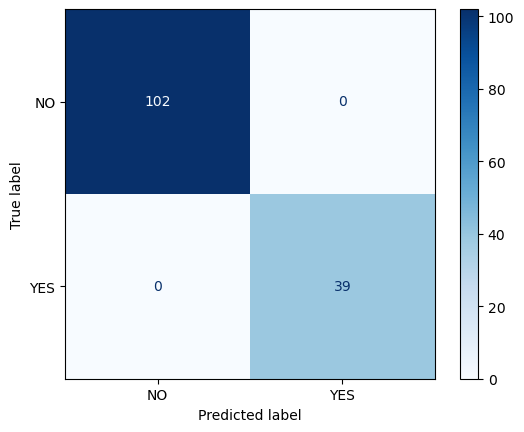

In [46]:
plt = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=svc.classes_)
plt.plot(cmap='Blues')

In [47]:
ConfusionMatrixDisplay?

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
params_grid = {
    'C' :[0.1, 1, 10],
    'kernel' : ['linear', 'rbf', 'poly'],
    'tol' : [0.001, 0.0001, 0.00001]
}

In [50]:
grid_search_svm = GridSearchCV(estimator=SVC(), param_grid= params_grid, cv = 5, verbose = True)

In [51]:
grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'],
                         'tol': [0.001, 0.0001, 1e-05]},
             verbose=True)

In [52]:
grid_search_svm.best_params_

{'C': 0.1, 'kernel': 'linear', 'tol': 0.001}

In [53]:
y_predict = grid_search_svm.best_estimator_.predict(X_test)

### Metrics

In [54]:
classif_report_grid = classification_report(y_test, y_predict)
print('Classification Report:\n', classif_report_grid)

Classification Report:
               precision    recall  f1-score   support

          NO       1.00      1.00      1.00       102
         YES       1.00      1.00      1.00        39

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [55]:
c_matrix_grid = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:\n', c_matrix_grid)

Confusion Matrix:
 [[102   0]
 [  0  39]]


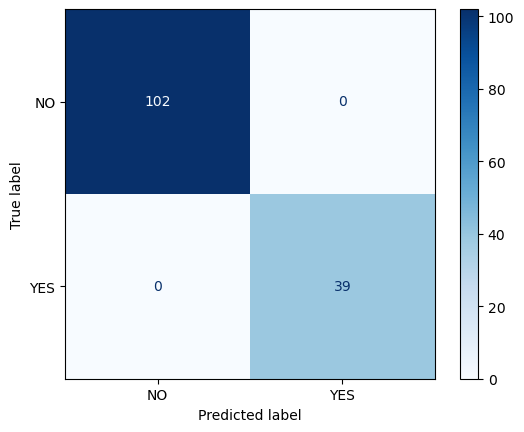

In [56]:
plt = ConfusionMatrixDisplay(confusion_matrix=c_matrix_grid, display_labels=grid_search_svm.classes_)
plt.plot(cmap='Blues')

### Importing the Model and training the model
### 1. AdaBoost

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [58]:
ada_classif = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        learning_rate=0.1,
        random_state=42
)

In [59]:
ada_classif.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, random_state=42)

In [60]:
y_ada = ada_classif.predict(X_test)

In [61]:
classif_report_grid = classification_report(y_test, y_ada)
print('Classification Report:\n', classif_report_grid)

Classification Report:
               precision    recall  f1-score   support

          NO       1.00      1.00      1.00       102
         YES       1.00      1.00      1.00        39

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [62]:
c_matrix_ada = confusion_matrix(y_test, y_ada)
print('Confusion Matrix:\n', c_matrix_ada)

Confusion Matrix:
 [[102   0]
 [  0  39]]


### 2. Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
gb_clf = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.1,
    max_depth=3, 
    random_state=42,
    verbose=True
)

In [65]:
gb_clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0040            0.23s
         2           0.8885            0.17s
         3           0.7982            0.16s
         4           0.7185            0.15s
         5           0.6528            0.14s
         6           0.5968            0.13s
         7           0.5461            0.13s
         8           0.5020            0.13s
         9           0.4639            0.12s
        10           0.4272            0.12s
        20           0.2086            0.10s
        30           0.1077            0.08s
        40           0.0575            0.07s
        50           0.0309            0.06s
        60           0.0168            0.05s
        70           0.0092            0.03s
        80           0.0050            0.02s
        90           0.0028            0.01s
       100           0.0015            0.00s


GradientBoostingClassifier(random_state=42, verbose=True)

In [66]:
y_gbm = gb_clf.predict(X_test)